### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

(-0.5, 199.5, 199.5, -0.5)

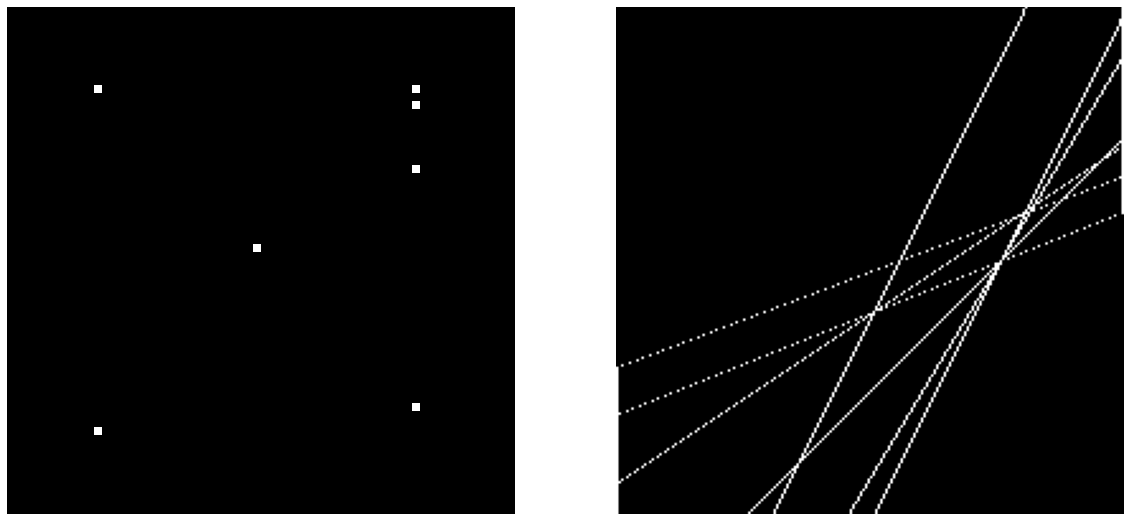

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks


def hough(I, aMin, aMax, aSkok, bMin, bMax, bSkok):
    A = np.arange(aMin,aMax,aSkok) #[round(aMin + i*aSkok,4) for i in range(0, int((abs(aMin) + abs(aMax))/aSkok) + 1)]
    B = np.arange(bMin,bMax,bSkok) #[round(bMin + i*bSkok,4) for i in range(0, int((abs(bMin) + abs(bMax))/bSkok) + 1)]
    
    H = np.zeros((len(A),len(B)), dtype=np.uint8)
    
    for i in range(0, I.shape[0]):
        for j in range(0, I.shape[1]):
            if I[i,j] == 1:
                for k in range (len(A)):   
                    a_idx = k 
                    b = -i * A[k] + j
                    b_idx = np.argmin(abs(B - b))

                    H[int(a_idx),b_idx] = 1             
    return H
    
I = np.zeros((64,64), dtype=np.uint8)

I[10, 51] = 1
I[53, 11] = 1
I[12, 51] = 1
I[20, 51] = 1
I[30, 31] = 1
I[10, 11] = 1

I[50, 51] = 1


H = hough(I, -5, 5, 0.05,-100,100,1)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,10)

axs[0].imshow(I, 'gray')
axs[0].axis('off')
axs[1].imshow(H, 'gray')
axs[1].axis('off')